<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-and-Statistical-Calibration-(Indirect-Inference)-on-Model" data-toc-modified-id="Data-and-Statistical-Calibration-(Indirect-Inference)-on-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data and Statistical Calibration (Indirect Inference) on Model</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Timothy-Kam-and-Junsang-Lee" data-toc-modified-id="Timothy-Kam-and-Junsang-Lee-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Timothy Kam and Junsang Lee</a></span></li></ul></li></ul></li><li><span><a href="#Purpose" data-toc-modified-id="Purpose-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Purpose</a></span></li><li><span><a href="#Annual-Data" data-toc-modified-id="Annual-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Annual Data</a></span><ul class="toc-item"><li><span><a href="#Truncated-data-(1948-2007)-(FRED's-GDP-deflator-inflation-rate-and-Lucas-Nicolini)" data-toc-modified-id="Truncated-data-(1948-2007)-(FRED's-GDP-deflator-inflation-rate-and-Lucas-Nicolini)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Truncated data (1948-2007) (FRED's GDP deflator inflation rate and Lucas-Nicolini)</a></span><ul class="toc-item"><li><span><a href="#Robustness:-Data-from-FRED-(CPI-inflation)-combined-with-Lucas-Nicolini" data-toc-modified-id="Robustness:-Data-from-FRED-(CPI-inflation)-combined-with-Lucas-Nicolini-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Robustness: Data from FRED (CPI inflation) combined with Lucas-Nicolini</a></span></li></ul></li></ul></li><li><span><a href="#Using-spline-basis-functions-to-fit-money-demand-($M1/GDP$-vs-$i$)" data-toc-modified-id="Using-spline-basis-functions-to-fit-money-demand-($M1/GDP$-vs-$i$)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Using spline basis functions to fit money demand ($M1/GDP$ vs $i$)</a></span><ul class="toc-item"><li><span><a href="#Data-by-subsamples" data-toc-modified-id="Data-by-subsamples-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data by subsamples</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Combined-plots" data-toc-modified-id="Combined-plots-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Combined plots</a></span></li></ul></li><li><span><a href="#Hand-calculation-from-model's-Stationary-Monetary-Equilibrium" data-toc-modified-id="Hand-calculation-from-model's-Stationary-Monetary-Equilibrium-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hand calculation from model's Stationary Monetary Equilibrium</a></span><ul class="toc-item"><li><span><a href="#For-calibrating-$\beta$-(1915-2007)" data-toc-modified-id="For-calibrating-$\beta$-(1915-2007)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>For calibrating $\beta$ (1915-2007)</a></span></li><li><span><a href="#Model's-stationary-equilibrium-elasticity" data-toc-modified-id="Model's-stationary-equilibrium-elasticity-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Model's stationary equilibrium elasticity</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Data and Statistical Calibration (Indirect Inference) on Model

### Timothy Kam and Junsang Lee

GitHub project site: https://github.com/phantomachine/csim

In [1]:
import requests, zipfile, io
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import os
from fredapi import Fred
from scipy import interpolate
# from seasonal import fit_seasons, adjust_seasons

%matplotlib inline

# Purpose

This notebook documents the steps we used to construct:

1. External calibration of model's annual discount factor (model is quarterly so model's solution is based on quarterly version) using ex-post Fisher relation on observed data:
    
    * T-Bill Rate (3-month) as proxy for a short rate (annual), $i$
    
    * GDP Deflator inflation rate as proxy for inflation (annual), $\pi$
    
2. Data mean of $M1/GDP$

    * Lucas and Nicolini's (JME, 2015) ``New M1`` series is used.
    
3. Spline-fitted relation between $M1/GDP$ and $i$ to obtain a point estimate of the elasticity of $M1/GDP$ w.r.t. $i$

    * Note: the spline-fitted model on the data is just an arbitrary auxiliary statistical model for indirect inference on our theory-implied elasticity.
   

# Annual Data


We get our data series, obtained from Minneapolis Fed Working Paper 718, *On the Stability of Money Demand*, by Robert E Lucas, Jr. and Juan Pablo Nicolini, at:

https://www.minneapolisfed.org/research/working-papers/on-the-stability-of-money-demand

**Note**: this paper was published in the [*Journal of Monetary Economics* (Vol. 73, July 2015, pp. 48-65)](http://dx.doi.org/10.1016/j.jmoneco.2015.03.005) 

In [2]:
# Note: 
# (1) The ! command below, escapes you from the current Python interface to the server Terminal prompt
# (2) pip install will install a new python package/library that may not be pre-existing already
# !pip install fredapi # uncomment and run if FRED API not installed yet

# Instantiate Fred class as "fred", use your own api_key!
fred = Fred(api_key='8f21f53dd9e218b356ed31f6aa39b26d')

In [3]:
# URL to data in ZIP format
url = "http://minneapolisfed.contentdm.oclc.org/utils/getdownloaditem/collection/p16030coll7/id/91/filename/92.zip"
zipf = requests.get(url)
# file = zipfile.ZipFile(io.BytesIO(zipf.content))
# file.extractall()

In [4]:
# View directory
!ls -la

total 7296
drwxrwxr-x 6 obiwan obiwan    4096 Jun 25 10:42  .
drwxrwxr-x 6 obiwan obiwan    4096 Apr  8 14:18  ..
drwxr-xr-x 4 obiwan obiwan    4096 Jan 15  2019  AdditionalFiles
-rw-rw-r-- 1 obiwan obiwan  520875 Jun 25 10:39  data_notes-lucas-nicolini-annual.html
-rw-rw-r-- 1 obiwan obiwan  217246 Jun 25 10:42  data_notes-lucas-nicolini-annual.ipynb
-rw-r--r-- 1 obiwan obiwan  382751 Jul 19  2018  data_notes-lucas-nicolini.html
drwxr-xr-x 2 obiwan obiwan    4096 Oct  2  2019  .ipynb_checkpoints
-rw-r--r-- 1 obiwan obiwan  607291 Jul 17  2018 'Long-run money demand redux _ VOX, CEPR Policy Portal.pdf'
-rw-r--r-- 1 obiwan obiwan  590222 Jul 17  2018  Lucas-Nicolini-Money-Demand-JME2015.pdf
-rw-r--r-- 1 obiwan obiwan   17370 Jul 19  2018  MoneyData_Lucas-Nicolini-Wang-Wright-Liu-version.xlsx
drwxrwxr-x 2 obiwan obiwan    4096 Jun 25 10:40  old
drwxr-xr-x 2 obiwan obiwan    4096 Jul 18  2018  papers
-rw-r--r-- 1 obiwan obiwan   32768 Jul 19  2018  USAGDPDEFAISMEI.xls
-rw-r--r-- 1 obiwan 

In [5]:
# Probe inside AdditionalFiles (from Lucas and Nicolini)
f = os.listdir("AdditionalFiles/data/")
print(f)

['AppendixMMDA.pdf', 'Quarterly_mmda.xlsx', 'data_consolidated.xlsx']


In [6]:
# Note: 
# (1) The ! command below, escapes you from the current Python interface to the server Terminal prompt
# (2) pip install will install a new python package/library that may not be pre-existing already
# !pip install fredapi # uncomment and run if FRED API not installed yet

# Instantiate Fred class as "fred", use your own api_key!
fred = Fred(api_key='8f21f53dd9e218b356ed31f6aa39b26d')

In [7]:
# Create empty dictionary
df = {}

In [8]:
# Import Lucas-Nicolini (2015, JME) dataset (Annual version)

# from RATES excel tab
data_lucas_nicolini_rates = pd.read_excel('AdditionalFiles/data/data_consolidated.xlsx', 'RATES')

# from data_consolidated tab
data_lucas_nicolini_m1sweep = pd.read_excel('AdditionalFiles/data/data_consolidated.xlsx','data_consolidated')

# from ASSETS tab
data_lucas_nicolini_gdp = pd.read_excel('AdditionalFiles/data/data_consolidated.xlsx', 'ASSETS')

In [9]:
# Store lists of data series and KEYs into dictionary df
df['Dates'] = data_lucas_nicolini_gdp['YEAR'].tolist()
df['T-Bill Rate (3-month, annual)'] = data_lucas_nicolini_rates['tbills3m'].tolist()
df['New M1 (annual)'] = data_lucas_nicolini_m1sweep['new_m1'].tolist()
df['GDP (Nominal, annual)'] = data_lucas_nicolini_gdp['GDP'].tolist()
nM1 = df['New M1 (annual)']
gdp = df['GDP (Nominal, annual)']
df['NewM1/GDP'] = [ nM1[i]/gdp[i] for i in range(len(nM1)) ]

obslength = []
keys = []
for list_idx, list_key in enumerate(df):
    list_length = len(df[list_key])
    print(list_idx, list_key, "> Observations:", list_length)
    obslength.append(list_length)
    keys.append(list_key)
obslength_min = min(obslength)
print("Shortest data series is %s with data length of %i" %(keys[obslength==obslength_min], obslength_min))

0 Dates > Observations: 102
1 T-Bill Rate (3-month, annual) > Observations: 96
2 New M1 (annual) > Observations: 98
3 GDP (Nominal, annual) > Observations: 102
4 NewM1/GDP > Observations: 98
Shortest data series is Dates with data length of 96


In [10]:
# Truncate longer series to have the same length of: obslength_min
for list_idx, list_key in enumerate(df):
    df[list_key] = df[list_key][0:obslength_min]

In [11]:
# Convert df to Pandas dataframe
d = pd.DataFrame(df)
d = d.set_index(d['Dates'])

In [12]:
# Truncate data window
date_truncate_start = '1915'
date_truncate_stop = '2007'

dcut = d.loc[date_truncate_start:date_truncate_stop]

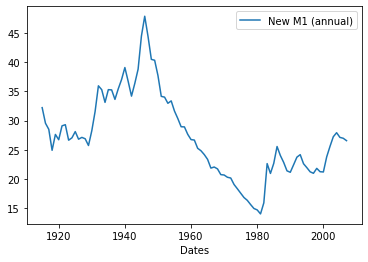

In [13]:
# Sweep adjusted M1 (M1S)
dcut.plot(y='New M1 (annual)')
plt.show()

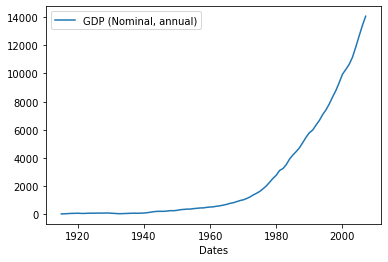

In [14]:
# Nominal GDP
dcut.plot(y='GDP (Nominal, annual)')
plt.show()

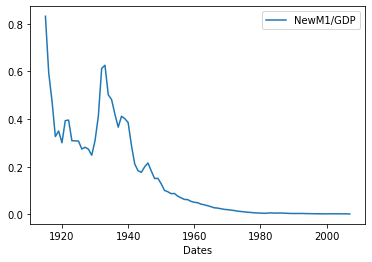

In [15]:
# M/PY using M1 (sweep adjusted) data for M, nominal GDP for PY
dcut.plot(y='NewM1/GDP')
plt.show()

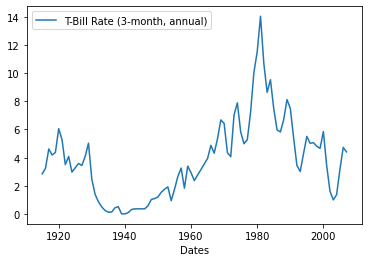

In [16]:
# T-Bill Rate (3-month, annual) := r
dcut.plot(y='T-Bill Rate (3-month, annual)')
plt.show()

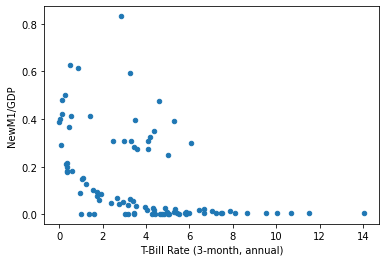

In [17]:
# Scatter plot M/PY vs. r
dcut.plot(x='T-Bill Rate (3-month, annual)', y='NewM1/GDP', kind='scatter')
plt.show()

In [18]:
# Full sample stats
dcut.mean()

Dates                            1961.000000
T-Bill Rate (3-month, annual)       3.854204
New M1 (annual)                    27.180772
GDP (Nominal, annual)            2581.647731
NewM1/GDP                           0.147899
dtype: float64

## Truncated data (1948-2007) (FRED's GDP deflator inflation rate and Lucas-Nicolini)

We use the sample from 1948 to 2007 only for external calibration of $\beta$ below. 

In [19]:
# Add data from FRED and KEY to dictionary
df_comb = fred.get_series('GNPDEF', frequency='a')
df_comb = df_comb.reset_index()
df_comb.columns = ['Dates', 'GDP Deflator']
df_comb = df_comb.set_index(df_comb['Dates'])
# df_fred = df_fred.diff(periods=1, axis=0)[1::]
df_comb['Inflation (GDP Deflator)'] = df_comb['GDP Deflator']/df_comb['GDP Deflator'].shift(1) - 1
df_comb = df_comb.loc['1947-01-01':'2007-01-01']

# Add data from Lucas-Nicolini (GDP Deflator inflation)
df_comb['T-bill Rate (3-month)'] = (dcut.loc['1947':'2007', 'T-Bill Rate (3-month, annual)']/100.).tolist()
df_comb['GDP'] = (dcut.loc['1947':'2007', 'GDP (Nominal, annual)']).tolist()
df_comb['New M1'] = (dcut.loc['1947':'2007', 'New M1 (annual)']).tolist()
df_comb['NewM1/GDP'] = (dcut.loc['1947':'2007', 'NewM1/GDP']).tolist()
df_comb = df_comb

In [20]:
# From first obs (since first-differencing GDP deflator loses one initial data point)
df_comb = df_comb.dropna(axis='rows')
df_comb

,Dates,GDP Deflator,Inflation (GDP Deflator),T-bill Rate (3-month),GDP,New M1,NewM1/GDP
Dates,,,,,,,
1948-01-01,1948-01-01,12.927,0.056127,0.01040,269.1,40.509104,0.150536
1949-01-01,1949-01-01,12.906,-0.001625,0.01102,267.2,40.351796,0.151017
1950-01-01,1950-01-01,13.059,0.011855,0.01218,293.7,37.725570,0.128449
1951-01-01,1951-01-01,13.989,0.071215,0.01552,339.3,34.155615,0.100665
1952-01-01,1952-01-01,14.232,0.017371,0.01766,358.3,34.018979,0.094946
1953-01-01,1953-01-01,14.406,0.012226,0.01931,379.3,32.963354,0.086906
1954-01-01,1954-01-01,14.539,0.009232,0.00953,380.4,33.375394,0.087738
1955-01-01,1955-01-01,14.785,0.016920,0.01753,414.7,31.620449,0.076249
1956-01-01,1956-01-01,15.289,0.034089,0.02658,437.4,30.349794,0.069387


### Robustness: Data from FRED (CPI inflation) combined with Lucas-Nicolini

If we want to use a longer data series for inflation to match up with the rest of the Lucas-Nicolini data series starting from 1915, then we'll have to construct inflation using CPI data from 1915. This section shows that this series co-moves with the GDP deflator closely for the overlapping sample periods from 1948 to 2007.

In [21]:
# Series from FRED: CPIAUCNS
# Add data from FRED and KEY to dictionary
df_comb2 = fred.get_series('CPIAUCNS', frequency='a')
df_comb2 = df_comb2.reset_index()
df_comb2.columns = ['Dates', 'CPI (seasonal)']
df_comb2 = df_comb2.set_index(df_comb2['Dates'])


start_year = '1915'
stop_year = '2007'# '2007'
df_comb2['Inflation (CPI, raw)'] = df_comb2['CPI (seasonal)']/df_comb2['CPI (seasonal)'].shift(1) - 1
df_comb2 = df_comb2.loc[start_year+'-01-01':stop_year+'-01-01']


# Add data from Lucas-Nicolini (GDP Deflator inflation)
df_comb2['T-bill Rate (3-month)'] = (dcut.loc[start_year:stop_year, 'T-Bill Rate (3-month, annual)']/100.).tolist()
df_comb2['GDP'] = (dcut.loc[start_year:stop_year, 'GDP (Nominal, annual)']).tolist()
df_comb2['New M1'] = (dcut.loc[start_year:stop_year, 'New M1 (annual)']).tolist()
df_comb2['NewM1/GDP'] = (dcut.loc[start_year:stop_year, 'NewM1/GDP']).tolist()

# From first obs (since first-differencing GDP deflator loses one initial data point)
df_comb2 = df_comb2.dropna(axis='rows')

<AxesSubplot:xlabel='Dates'>

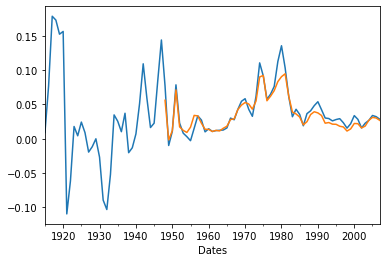

In [22]:
# Visually check if OK (i.e., "reasonable") to use CPI inflation instead of GDP-deflator inflation
df_comb2['Inflation (CPI, raw)'].plot()
df_comb['Inflation (GDP Deflator)'].plot()

In our calibrations below, we will externally calibrate $\beta$ using the T-Bill (3-month) rate and the CPI growth rate for data stored above in the subset of ``df_comb2`` Thus we will ignore this GDP-deflator inflation series.

# Using spline basis functions to fit money demand ($M1/GDP$ vs $i$)

## Data by subsamples

In [23]:
# Full sample 1915-2007
y = df_comb2['NewM1/GDP'].tolist()
x = df_comb2['T-bill Rate (3-month)'].tolist()
# Fit a spline regression
data = np.asarray(sorted(zip(x,y)))
L_fit = interpolate.splrep(data[:,0], data[:,1], s=3)

In [24]:
# Fitted model, full sample
i_mean = np.asarray(x).mean()
L_mean = interpolate.splev(i_mean, L_fit, der=0)
L_mean_slope = interpolate.splev(i_mean, L_fit, der=1)

In [25]:
# Subsample 1915-1945
start_sub0 = '1915'
end_sub0 = '1945'
df_temp = df_comb2.loc[start_sub0+'-01-01':end_sub0+'-01-01']
y2 = df_temp['NewM1/GDP'].tolist()
x2 = df_temp['T-bill Rate (3-month)'].tolist()

In [26]:
# Post WW2, Subsample 1946-2000
start_sub = str(int(end_sub0)+1)
end_sub = '2000'
df_comb3 = df_comb2.loc[start_sub+'-01-01':end_sub+'-01-01']
y3 = df_comb3['NewM1/GDP'].tolist()
x3 = df_comb3['T-bill Rate (3-month)'].tolist()
# Fit a spline regression
data3 = np.asarray(sorted(zip(x3,y3)))
L_fit3 = interpolate.splrep(data3[:,0], data3[:,1], s=3)

In [27]:
# Post-2000, Pre Great Recession, Subsample 2001-2007 (Jan 1!)
start_sub4 = '2001'
end_sub4 = '2007'
df_comb4 = df_comb2.loc[start_sub4+'-01-01':end_sub4+'-01-01']
y4 = df_comb4['NewM1/GDP'].tolist()
x4 = df_comb4['T-bill Rate (3-month)'].tolist()

## Model

In [28]:
tbrate = np.array([0.        , 0.0327381 , 0.06547619, 0.09821429, 0.13095238,
       0.16369048, 0.19642857, 0.22916667, 0.26190476, 0.29464286,
       0.32738095, 0.36011905, 0.39285714, 0.42559524, 0.45833333,
       0.49107143, 0.52380952, 0.55654762, 0.58928571, 0.62202381,
       0.6547619 , 0.6875    , 0.7202381 , 0.75297619, 0.78571429,
       0.81845238, 0.85119048, 0.88392857, 0.91666667, 0.94940476,
       0.98214286, 1.01488095, 1.04761905, 1.08035714, 1.11309524,
       1.14583333, 1.17857143, 1.21130952, 1.24404762, 1.27678571,
       1.30952381, 1.3422619 , 1.375     , 1.4077381 , 1.44047619,
       1.47321429, 1.50595238, 1.53869048, 1.57142857, 1.60416667])

In [29]:
tbrate = tbrate[1::]
tbrate

array([0.0327381 , 0.06547619, 0.09821429, 0.13095238, 0.16369048,
       0.19642857, 0.22916667, 0.26190476, 0.29464286, 0.32738095,
       0.36011905, 0.39285714, 0.42559524, 0.45833333, 0.49107143,
       0.52380952, 0.55654762, 0.58928571, 0.62202381, 0.6547619 ,
       0.6875    , 0.7202381 , 0.75297619, 0.78571429, 0.81845238,
       0.85119048, 0.88392857, 0.91666667, 0.94940476, 0.98214286,
       1.01488095, 1.04761905, 1.08035714, 1.11309524, 1.14583333,
       1.17857143, 1.21130952, 1.24404762, 1.27678571, 1.30952381,
       1.3422619 , 1.375     , 1.4077381 , 1.44047619, 1.47321429,
       1.50595238, 1.53869048, 1.57142857, 1.60416667])

In [30]:
mpy = np.array([5.00000000e-01, 5.19802735e-01, 3.13056038e-01, 1.98708757e-01,
       1.31813441e-01, 9.07307769e-02, 6.44312173e-02, 4.69867231e-02,
       3.50569145e-02, 2.66796209e-02, 2.06594128e-02, 1.62442277e-02,
       1.29473154e-02, 1.04455989e-02, 8.51975601e-03, 7.01785899e-03,
       5.83272854e-03, 4.88749371e-03, 4.12618544e-03, 3.50748901e-03,
       3.00051990e-03, 2.58192101e-03, 2.23383756e-03, 1.94248464e-03,
       1.69712090e-03, 1.48930429e-03, 1.31234652e-03, 1.16090877e-03,
       1.03069934e-03, 9.18245403e-04, 8.20719209e-04, 7.35804731e-04,
       6.61594514e-04, 5.96509345e-04, 5.39235258e-04, 4.88673821e-04,
       4.43902663e-04, 4.04143948e-04, 3.68739062e-04, 3.37128180e-04,
       3.08833686e-04, 2.83446664e-04, 2.60615831e-04, 2.40038441e-04,
       2.21452764e-04, 2.04631864e-04, 1.89378404e-04, 1.75520320e-04,
       1.62907189e-04, 1.51407168e-04])

In [31]:
mpy = mpy[1::]
mpy

array([5.19802735e-01, 3.13056038e-01, 1.98708757e-01, 1.31813441e-01,
       9.07307769e-02, 6.44312173e-02, 4.69867231e-02, 3.50569145e-02,
       2.66796209e-02, 2.06594128e-02, 1.62442277e-02, 1.29473154e-02,
       1.04455989e-02, 8.51975601e-03, 7.01785899e-03, 5.83272854e-03,
       4.88749371e-03, 4.12618544e-03, 3.50748901e-03, 3.00051990e-03,
       2.58192101e-03, 2.23383756e-03, 1.94248464e-03, 1.69712090e-03,
       1.48930429e-03, 1.31234652e-03, 1.16090877e-03, 1.03069934e-03,
       9.18245403e-04, 8.20719209e-04, 7.35804731e-04, 6.61594514e-04,
       5.96509345e-04, 5.39235258e-04, 4.88673821e-04, 4.43902663e-04,
       4.04143948e-04, 3.68739062e-04, 3.37128180e-04, 3.08833686e-04,
       2.83446664e-04, 2.60615831e-04, 2.40038441e-04, 2.21452764e-04,
       2.04631864e-04, 1.89378404e-04, 1.75520320e-04, 1.62907189e-04,
       1.51407168e-04])

In [32]:
L_fit_model = interpolate.splrep(tbrate, mpy, s=3)

## Combined plots

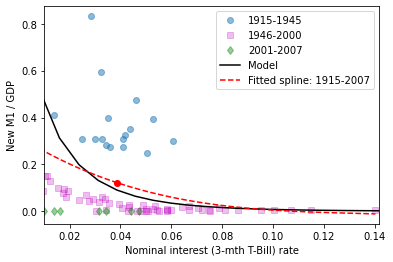

In [51]:
# Scatter plot data - Pre Great Depression
start_pgd = str(int(start_sub)-1)
plt.plot(x2, y2, 'o', 
         alpha=0.5,
         label=start_year+'-'+start_pgd)

# Scatter plot data - Post Great Depression to 2000
plt.plot(x3, y3, 'sm', 
         alpha=0.25,
         label=start_sub+'-'+end_sub)

# Scatter plot data - 2000-2007
plt.plot(x4, y4, 'dg', 
         alpha=0.4,
         label=start_sub4+'-'+end_sub4)

# CSIM model - Calibrated (to whole sample) 
plt.plot((1.0+tbrate)**0.25 - 1.0, mpy, 
                             '-k', 
                             label="Model")

# Whole data sample - Plot fitted spline function 
i_set = np.linspace(data[:,0].min(), data[:,0].max())
L_set = interpolate.splev(i_set, L_fit, der=0)
plt.plot(i_set, L_set, '--r', label="Fitted spline: "+start_year+'-'+stop_year)
# Plot point where data at mean - 1915-2007
plt.plot(i_mean, L_mean, 'or')

# Plot fitted spline function : Subsample 1946-2000
# i_set3 = np.linspace(data3[:,0].min(), data3[:,0].max())
# L_set3 = interpolate.splev(i_set3, L_fit3, der=0)
# plt.plot(i_set3, L_set3, '+-m', 
# label="Fitted spline: "+start_sub+'-'+end_sub)

plt.xlabel("Nominal interest (3-mth T-Bill) rate")
plt.ylabel("New M1 / GDP")
plt.xlim([0.01, 1.01*max(x)])
plt.legend()
plt.show()

**Note**: The red dot corresponds to the fitted value of $M1/GDP$ at the sample mean of nominal interest rate.

In [34]:
# Full sample spline estimand
Elasticity_L_i = L_mean_slope*i_mean/L_mean
print("L_mean = %6.4f" %(L_mean))
print("i_mean = %6.4f" %(i_mean))
print("Slope = %6.4f" %(L_mean_slope))
print("Elasticity of M1/GDP w.r.t. Nominal Interest Rate = %6.4f" %(Elasticity_L_i) )

L_mean = 0.1226
i_mean = 0.0385
Slope = -3.5883
Elasticity of M1/GDP w.r.t. Nominal Interest Rate = -1.1279


In [35]:
# i_mean3 = np.asarray(x3).mean()
# L_mean3 = interpolate.splev(i_mean3, L_fit3, der=0)
# L_mean_slope3 = interpolate.splev(i_mean3, L_fit3, der=1)

# Elasticity_L_i3 = L_mean_slope3*i_mean3/(L_mean3)
# print("L_mean = %6.4f" %(L_mean3))
# print("i_mean = %6.4f" %(i_mean3))
# print("Slope = %6.4f" %(L_mean_slope3))
# print("Elasticity of M1/GDP w.r.t. Nominal Interest Rate = %6.4f" %(Elasticity_L_i3) )

In [36]:
# Show data means
print("Mean in Annual Data:\n")
df_comb2.mean(numeric_only=True)

Mean in Annual Data:



CPI (seasonal)             61.693871
Inflation (CPI, raw)        0.034330
T-bill Rate (3-month)       0.038542
GDP                      2581.647731
New M1                     27.180772
NewM1/GDP                   0.147899
dtype: float64

In [37]:
# For later years ...
df_comb3.mean(numeric_only=True)

CPI (seasonal)             71.305418
Inflation (CPI, raw)        0.042451
T-bill Rate (3-month)       0.049030
GDP                      2782.676364
New M1                     24.655819
NewM1/GDP                   0.037783
dtype: float64

# Hand calculation from model's Stationary Monetary Equilibrium

## For calibrating $\beta$ (1915-2007)

Ex post Fisher relation gives us
$$
(1+r) = \frac{1+i}{1+\pi}
$$
where
* $r$, real interest rate
* $i$, nominal interest rate
* $\pi$, inflation rate

In a stationary equilibrium in the model, we have $\beta = 1/(1+r)$. So we can relate $\beta$ to long run average in data as:
$$
\beta = \frac{1+\pi}{1+i}
$$

In [38]:
# Nominal interest rate
i = df_comb2['T-bill Rate (3-month)'].tolist()
ibar = np.asarray(i).mean()
# Inflation rate
pi = df_comb2['Inflation (CPI, raw)'].tolist()
pibar = np.asarray(pi).mean()
# Compute BETA
beta = (1.0 + pibar)/(1.0 + ibar)
print("BETA = %0.5g" % (beta))

BETA = 0.99594


## Model's stationary equilibrium elasticity

Getting elasticity of M1/GDP w.r.t. i:
$$
\eta_i := \frac{d (M1/GDP)}{di}\frac{\bar{i}}{\bar{M1/GDP}} = \frac{\partial (M1/GDP)}{\partial \pi} \frac{d\pi}{di}\frac{\bar{i}}{\bar{M1/GDP}}
$$
And set
$$
\frac{d\pi}{di} = \beta
$$

since Fisher relation says $\pi = \beta (1+i) - 1$.

In [39]:
# M1/GDP ratio from model equilibrium. Already Annualized in CALIBRATE.PY: Q freq --> A freq
M1GDPbar = 0.188160
# Numerical gradient of M1/GDP wrt inflation rate. Annualized: Q freq --> A freq
slope_M1GDP_pi = -0.447899 #-0.359968
slope_M1GDP_pi = slope_M1GDP_pi*16
print(slope_M1GDP_pi)

# Elasticity
ETA = slope_M1GDP_pi*beta*(ibar/M1GDPbar)
print("Model implied elasticity of M1/GDP w.r.t. i = %6.4f" % (ETA))

-7.166384
Model implied elasticity of M1/GDP w.r.t. i = -1.4620


# Summary

We did the following:

* For fixed model parameters $(\bar{U}_{DM}, \kappa, \chi)$ we can generated annualized measures of average hours worked and M1/GDP ratio; and we also compute implied point-elasticity of $M1/GDP$ w.r.t. $i$, within an $\epsilon$-neighborhood of model solved at the data's average inflation and interest rates.

* Model parameters $(\bar{U}_{DM}, \kappa, \chi)$ are searched to make them as close as possible to the data avarages for hours worked and M1/GDP ratio, and, as close as possible to the auxiliary spline-fit statistical model's elasticity of $M1/GDP$ w.r.t. $i$ (point elasticity at data means).

Here's the result:

In [40]:
rowlabels = ["Hours", "Mean M1/GDP", "Elasticity: (M1/GDP), i"]
matchabox_data = [ 1.0/3.0, df_comb2['NewM1/GDP'].mean(), Elasticity_L_i  ]
matchabox_model = [ 0.329899, M1GDPbar, ETA  ]
matcha_table = {    "Aux. Statistic": rowlabels,
                    "Data (M1)": matchabox_data,
                    "Model (Avg)": matchabox_model, 
               }
# Create dataframe
df_matcha = pd.DataFrame(data=matcha_table)
df_matcha

,Aux. Statistic,Data (M1),Model (Avg)
0,Hours,0.333333,0.329899
1,Mean M1/GDP,0.147899,0.188160
2,"Elasticity: (M1/GDP), i",-1.127899,-1.461983


Models parameters were
* ``chi=0.03`` (which implies ``CHI=0.029670``)
* ``UbarDM=407.7725``
* ``KAPPA=0.003997``

Fixed and normalized parameters

* ``A=1.0``

* ``UbarCM=1.00`` 

Model solved with (quarterly) inflation/money growth rate 

* ``TAU=0.008894``
